**Import Banco de Dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
links = pd.read_csv("../input/links.csv")
filmes = pd.read_csv("../input/movies.csv")
notas = pd.read_csv("../input/ratings.csv")
tags = pd.read_csv("../input/tags.csv")

In [2]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [3]:
filmes.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
notas.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [5]:
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [6]:
notas.shape

(100836, 4)

**Analizando notas em geral**

In [7]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head

<bound method NDFrame.head of         usuarioId  filmeId  nota     momento
0               1        1   4.0   964982703
1               1        3   4.0   964981247
2               1        6   4.0   964982224
3               1       47   5.0   964983815
4               1       50   5.0   964982931
...           ...      ...   ...         ...
100831        610   166534   4.0  1493848402
100832        610   168248   5.0  1493850091
100833        610   168250   5.0  1494273047
100834        610   168252   5.0  1493846352
100835        610   170875   3.0  1493846415

[100836 rows x 4 columns]>

In [8]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
print("media",notas['nota'].mean())
print("mediana",notas['nota'].median())

media 3.501556983616962
mediana 3.5


In [11]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

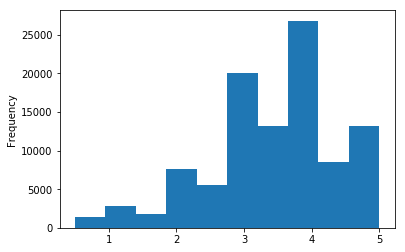

In [12]:
notas.nota.plot(kind='hist')

In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

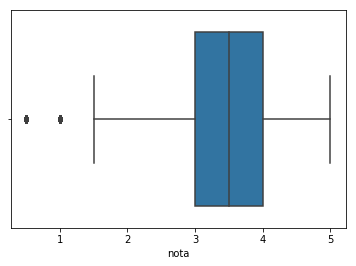

In [14]:
import seaborn as sns

sns.boxplot(notas.nota)

**Analizando os filmes**

In [15]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

filmeId                              titulo  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [16]:
notas.head()

usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

**Analizando algumas notas por filme**

In [17]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [18]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [19]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

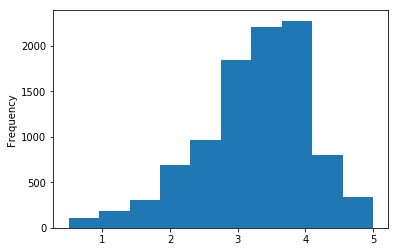

In [20]:
medias_por_filme.plot(kind='hist')

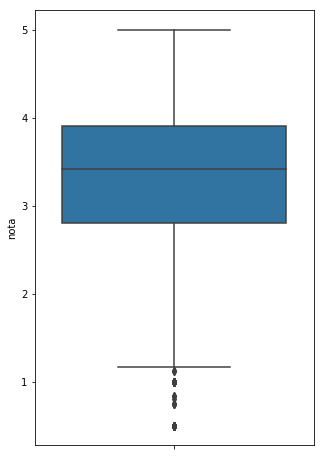

In [21]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

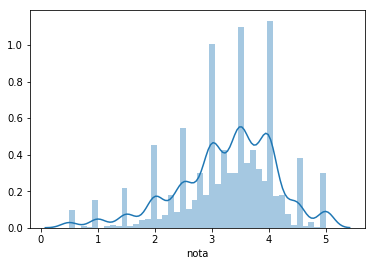

In [23]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

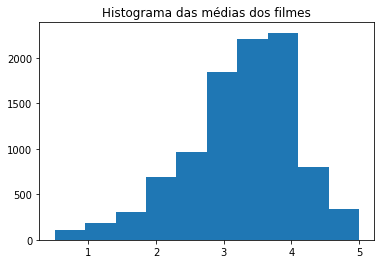

In [24]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")